# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import random
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
base_url = "https://samples.openweathermap.org/data/2.5/weather?id=2172797" 
Citycall = base_url + "&appid=" + weather_api_key
response = requests.get(Citycall)

<bound method Response.json of <Response [200]>>

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#Make list for the data frame 
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

CITY = 1
for city in cities:
    try:
        response = requests.get(f'{Citycall}{city}').json()
        City.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        print(f'Finding Citys: {CITY} | {city}')
        CITY = CITY + 1
    except KeyError:
        print(f'City not found')
    time.sleep(1)

Finding CITY: 1 | puerto ayora
Finding CITY: 2 | carnarvon
Finding CITY: 3 | shihezi
Finding CITY: 4 | mantua
Finding CITY: 5 | samarai
Finding CITY: 6 | beloha
Finding CITY: 7 | sur
Finding CITY: 8 | hambantota
Finding CITY: 9 | bushehr
Finding CITY: 10 | atikokan
Finding CITY: 11 | port hardy
Finding CITY: 12 | french harbor
Finding CITY: 13 | missoula
Finding CITY: 14 | atuona
Finding CITY: 15 | rikitea
Finding CITY: 16 | saint george
Finding CITY: 17 | prainha
Finding CITY: 18 | los llanos de aridane
Finding CITY: 19 | lincoln
Finding CITY: 20 | alotau
Finding CITY: 21 | haibowan
Finding CITY: 22 | kutum
Finding CITY: 23 | luderitz
Finding CITY: 24 | bandon
Finding CITY: 25 | mahebourg
Finding CITY: 26 | prince albert
Finding CITY: 27 | tarudant
Finding CITY: 28 | jaffna
Finding CITY: 29 | yenagoa
Finding CITY: 30 | rawson
Finding CITY: 31 | jamestown
Finding CITY: 32 | diamantino
Finding CITY: 33 | mataura
Finding CITY: 34 | manokwari
Finding CITY: 35 | busselton
Finding CITY: 36 

Finding CITY: 285 | hobart
Finding CITY: 286 | magole
Finding CITY: 287 | linxi
Finding CITY: 288 | fethiye
Finding CITY: 289 | fortuna
Finding CITY: 290 | manhattan
Finding CITY: 291 | riyadh
Finding CITY: 292 | agropoli
Finding CITY: 293 | staraya poltavka
Finding CITY: 294 | vila
Finding CITY: 295 | dera din panah
Finding CITY: 296 | ixtapa
Finding CITY: 297 | augusto correa
Finding CITY: 298 | la ronge
Finding CITY: 299 | jablah
Finding CITY: 300 | verkhniy tagil
Finding CITY: 301 | thompson
Finding CITY: 302 | kununurra
Finding CITY: 303 | mangrol
Finding CITY: 304 | salalah
Finding CITY: 305 | pidhorodne
Finding CITY: 306 | east london
Finding CITY: 307 | nanfeng
Finding CITY: 308 | boyolangu
Finding CITY: 309 | terney
Finding CITY: 310 | kurumkan
Finding CITY: 311 | gamba
Finding CITY: 312 | yermakovskoye


SSLError: HTTPSConnectionPool(host='samples.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?id=2172797&appid=a60d0f27cd9f40dd14ecf4578664322epanaba (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')",),))

In [34]:
Weathercity_df = pd.DataFrame({"City": City,
                         "Cloudiness": Cloudiness,
                         "Country": Country, 
                         "Date": Date,
                         "Humidity": Humidity,
                         "Lat": Lat,
                         "Lng": Lng,
                         "Max Temp": Max_Temp,
                         "Wind Speed": Wind_Speed})

Weathercity_df.to_csv("cities_data.csv",index= False )
Weathercity_df.dropna(axis=0, how='any')
Weathercity_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cairns,40,AU,1485790200,74,-16.92,145.77,300.15,3.6
1,Cairns,40,AU,1485790200,74,-16.92,145.77,300.15,3.6
2,Cairns,40,AU,1485790200,74,-16.92,145.77,300.15,3.6
3,Cairns,40,AU,1485790200,74,-16.92,145.77,300.15,3.6
4,Cairns,40,AU,1485790200,74,-16.92,145.77,300.15,3.6


In [24]:
cities= pd.read_csv('../output_data/cities.csv')
cities_df=pd.DataFrame(cities)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

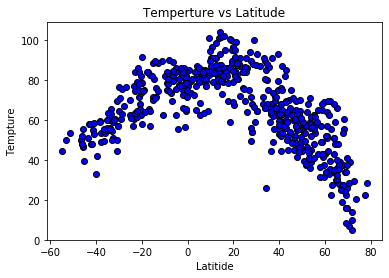

In [29]:
#Scatter Plot of Temperture vs Latitude 
Temp_Lat=cities_df.dropna()
Temp_Lat
plt.scatter(Temp_Lat.iloc[:,6],Temp_Lat.iloc[:,8], marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.xlabel('Latitide')
plt.ylabel('Tempture')
plt.title("Temperture vs Latitude")
plt.show()

#### Latitude vs. Humidity Plot

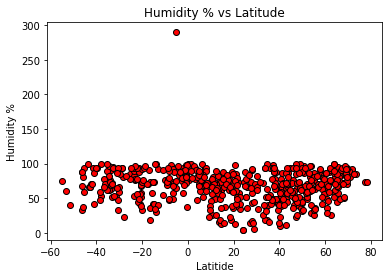

In [30]:
#Scatter Plot of Humidity% vs Latitude 
Temp_Lat=cities_df.dropna()
Temp_Lat
plt.scatter(Temp_Lat.iloc[:,6],Temp_Lat.iloc[:,5], marker="o", facecolors="red", edgecolors="black", alpha = 1)
plt.xlabel('Latitide')
plt.ylabel('Humidity %')
plt.title("Humidity % vs Latitude")
plt.show()

#### Latitude vs. Cloudiness Plot

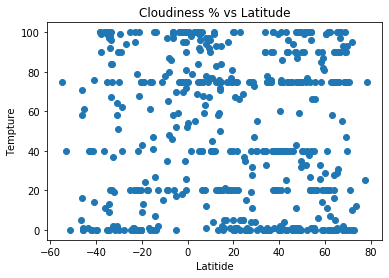

In [28]:
#Scatter Plot of Cloudiness% vs Latitude 
Temp_Lat=cities_df.dropna()
Temp_Lat
plt.scatter(Temp_Lat.iloc[:,6],Temp_Lat.iloc[:,2])
plt.xlabel('Latitide')
plt.ylabel('Tempture')
plt.title("Cloudiness % vs Latitude")
plt.show()

#### Latitude vs. Wind Speed Plot

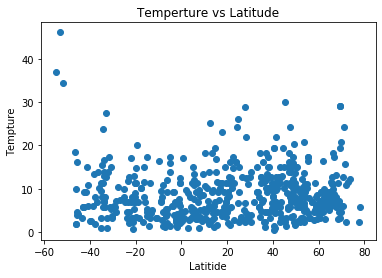

In [27]:
Temp_Lat=cities_df.dropna()
Temp_Lat
plt.scatter(Temp_Lat.iloc[:,6],Temp_Lat.iloc[:,9])
plt.xlabel('Latitide')
plt.ylabel('Tempture')
plt.title("Temperture vs Latitude")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression